# Example one
<center>$\left\{\begin{array}{l}\frac{d y}{d t}=\sin \left(t^{2}\right) \\ y(-10)=1\end{array}\right.$</center>

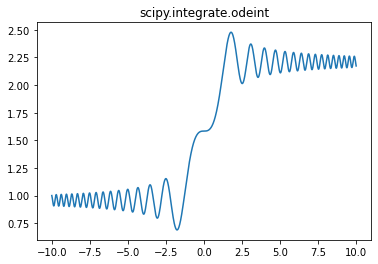

In [1]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt

def dy_dt(y, t): 
    return np.sin(t**2)

y0 = [1]  
t = np.arange(-10,10,0.01)
y = odeint(dy_dt, y0, t)  

plt.plot(t, y)
plt.title("scipy.integrate.odeint")
plt.show()

# Example two
<center>$\left\{\begin{array}{l}\frac{d x}{d t}=\sigma(y-x) \\ \frac{d y}{d t}=x(\rho-z)-y \\ \frac{d z}{d t}=x y-\beta z\end{array}\right.$</center>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


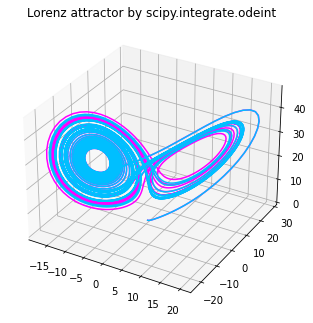

In [2]:
from scipy.integrate import odeint   
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# derivative function, find the derivative of the point W=[x,y,z] dW/dt
def lorenz(W,t,p,r,b):  
    x, y, z = W  # W=[x,y,z]
    dx_dt = p*(y-x)  # dx/dt = p*(y-x), p: sigma
    dy_dt = x*(r-z) - y  # dy/dt = x*(r-z)-y, r:rho
    dz_dt = x*y - b*z  # dz/dt = x*y - b*z, b;beta
    return np.array([dx_dt,dy_dt,dz_dt])

t = np.arange(0, 30, 0.01)  
paras = (10.0, 28.0, 3.0)  # Set the parameters (p,r,b) in the Lorenz equation

# The call to ode solves for lorenz with two different initial values W1 and W2, respectively
W1 = (0.0, 1.00, 0.0)  
track1 = odeint(lorenz, W1, t, args=(10.0, 28.0, 3.0))
W2 = (0.0, 1.01, 0.0)  
track2 = odeint(lorenz, W2, t, args=paras)  

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2], color='magenta') 
ax.plot(track2[:,0], track2[:,1], track2[:,2], color='deepskyblue')
ax.set_title("Lorenz attractor by scipy.integrate.odeint")
plt.show()

# Example three
<center>$\left\{\begin{array}{l}\frac{d^{2} u}{d t^{2}}+\frac{R}{L} * \frac{d u}{d t}+\frac{1}{L C} * u=0 \\ u(0)=U_{0} \\ u^{\prime}(0)=0\end{array}\right.$</center>
We have to first convert this system of equations into a system of first order differential equations.
<center>$\left\{\begin{aligned} \frac{d u}{d t} &=v \\ \frac{d v}{d t} &=-2 \alpha v-\omega_{0}^{2} u \\ u(0) &=U_{0} \\ v(0) &=0 \end{aligned}\right.$</center>

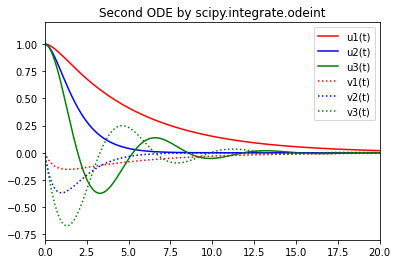

In [3]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt

def deriv(Y, t, a, w):
    u, v = Y  # Y=[u,v]
    dY_dt = [v, -2*a*v-w*w*u]
    return dY_dt

t = np.arange(0, 20, 0.01)  

paras1 = (1, 0.6)  # Overdamping：a^2 - w^2 > 0
paras2 = (1, 1)  # Critical damping：a^2 - w^2 = 0
paras3 = (0.3, 1)  # Underdamping：a^2 - w^2 < 0

Y0 = (1.0, 0.0)  
Y1 = odeint(deriv, Y0, t, args=paras1) 
Y2 = odeint(deriv, Y0, t, args=paras2)
Y3 = odeint(deriv, Y0, t, args=paras3)  

plt.plot(t, Y1[:, 0], 'r-', label='u1(t)')
plt.plot(t, Y2[:, 0], 'b-', label='u2(t)')
plt.plot(t, Y3[:, 0], 'g-', label='u3(t)')
plt.plot(t, Y1[:, 1], 'r:', label='v1(t)')
plt.plot(t, Y2[:, 1], 'b:', label='v2(t)')
plt.plot(t, Y3[:, 1], 'g:', label='v3(t)')
plt.axis([0, 20, -0.8, 1.2])
plt.legend(loc='best')
plt.title("Second ODE by scipy.integrate.odeint")
plt.show()